# Binary Prediction of Smoker Status using Bio-Signals


## Contents
1. Background
2. Import Data and New Variables
3. Analyzing the Data
4. Correlation of Variables
5. Shape Data for Model
6. Generalized Linear Model

## 1. Background

Website: https://www.kaggle.com/competitions/playground-series-s3e24/overview

Walter Reade, Ashley Chow. (2023). Binary Prediction of Smoker Status using Bio-Signals. Kaggle. https://kaggle.com/competitions/playground-series-s3e24

Smoking has been proven to negatively affect health in a multitude of ways.Smoking has been found to harm nearly every organ of the body, cause many diseases, as well as reducing the life expectancy of smokers in general. As of 2018, smoking has been considered the leading cause of preventable morbidity and mortality in the world, continuing to plague the world’s overall health.

According to a World Health Organization report, the number of deaths caused by smoking will reach 10 million by 2030.

Evidence-based treatment for assistance in smoking cessation had been proposed and promoted. however, only less than one third of the participants could achieve the goal of abstinence. Many physicians found counseling for smoking cessation ineffective and time-consuming, and did not routinely do so in daily practice. To overcome this problem, several factors had been proposed to identify smokers who had a better chance of quitting, including the level of nicotine dependence, exhaled carbon monoxide (CO) concentration, cigarette amount per day, the age at smoking initiation, previous quit attempts, marital status, emotional distress, temperament and impulsivity scores, and the motivation to stop smoking. However, individual use of these factors for prediction could lead to conflicting results that were not straightforward enough for the physicians and patients to interpret and apply. Providing a prediction model might be a favorable way to understand the chance of quitting smoking for each individual smoker. Health outcome prediction models had been developed using methods of machine learning over recent years.

A group of scientists are working on predictive models with smoking status as the prediction target.Your task is to help them create a machine learning model to identify the smoking status of an individual using bio-signals

Dataset Description -

age : 5-years gap

height(cm)

weight(kg)

waist(cm) : Waist circumference length

eyesight(left)

eyesight(right)

hearing(left)

hearing(right)

systolic : Blood pressure

relaxation : Blood pressure

fasting blood sugar

Cholesterol : total

triglyceride

HDL : cholesterol type

LDL : cholesterol type

hemoglobin

Urine protein

serum creatinine

AST : glutamic oxaloacetic transaminase type

ALT : glutamic oxaloacetic transaminase type

Gtp : γ-GTP

dental caries

smoking

## 2. Import Data and New Variables

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Import datasets (trian, test, sample submission)
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv('sample_submission.csv')

In [3]:
# Show basic information about
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [4]:
# Look for NA values in any of the columns
na_list = []
for i in range(0,len(train_df.columns)):
    x = train_df.columns[i] + "-" + str(train_df[train_df.columns[i]].isna().value_counts(True)[0])
    na_list.append(x)

C:\Users\umerb\AppData\Local\Temp\ipykernel_7504\2921878173.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = train_df.columns[i] + "-" + str(train_df[train_df.columns[i]].isna().value_counts(True)[0])


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height(cm)'}>,
        <Axes: title={'center': 'weight(kg)'}>,
        <Axes: title={'center': 'waist(cm)'}>],
       [<Axes: title={'center': 'eyesight(left)'}>,
        <Axes: title={'center': 'eyesight(right)'}>,
        <Axes: title={'center': 'hearing(left)'}>,
        <Axes: title={'center': 'hearing(right)'}>,
        <Axes: title={'center': 'systolic'}>],
       [<Axes: title={'center': 'relaxation'}>,
        <Axes: title={'center': 'fasting blood sugar'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'triglyceride'}>,
        <Axes: title={'center': 'HDL'}>],
       [<Axes: title={'center': 'LDL'}>,
        <Axes: title={'center': 'hemoglobin'}>,
        <Axes: title={'center': 'Urine protein'}>,
        <Axes: title={'center': 'serum creatinine'}>,
        <Axes: title={'center': 'AST'}>],
       [<Axes: title={'center': 'ALT'}>, <Axes

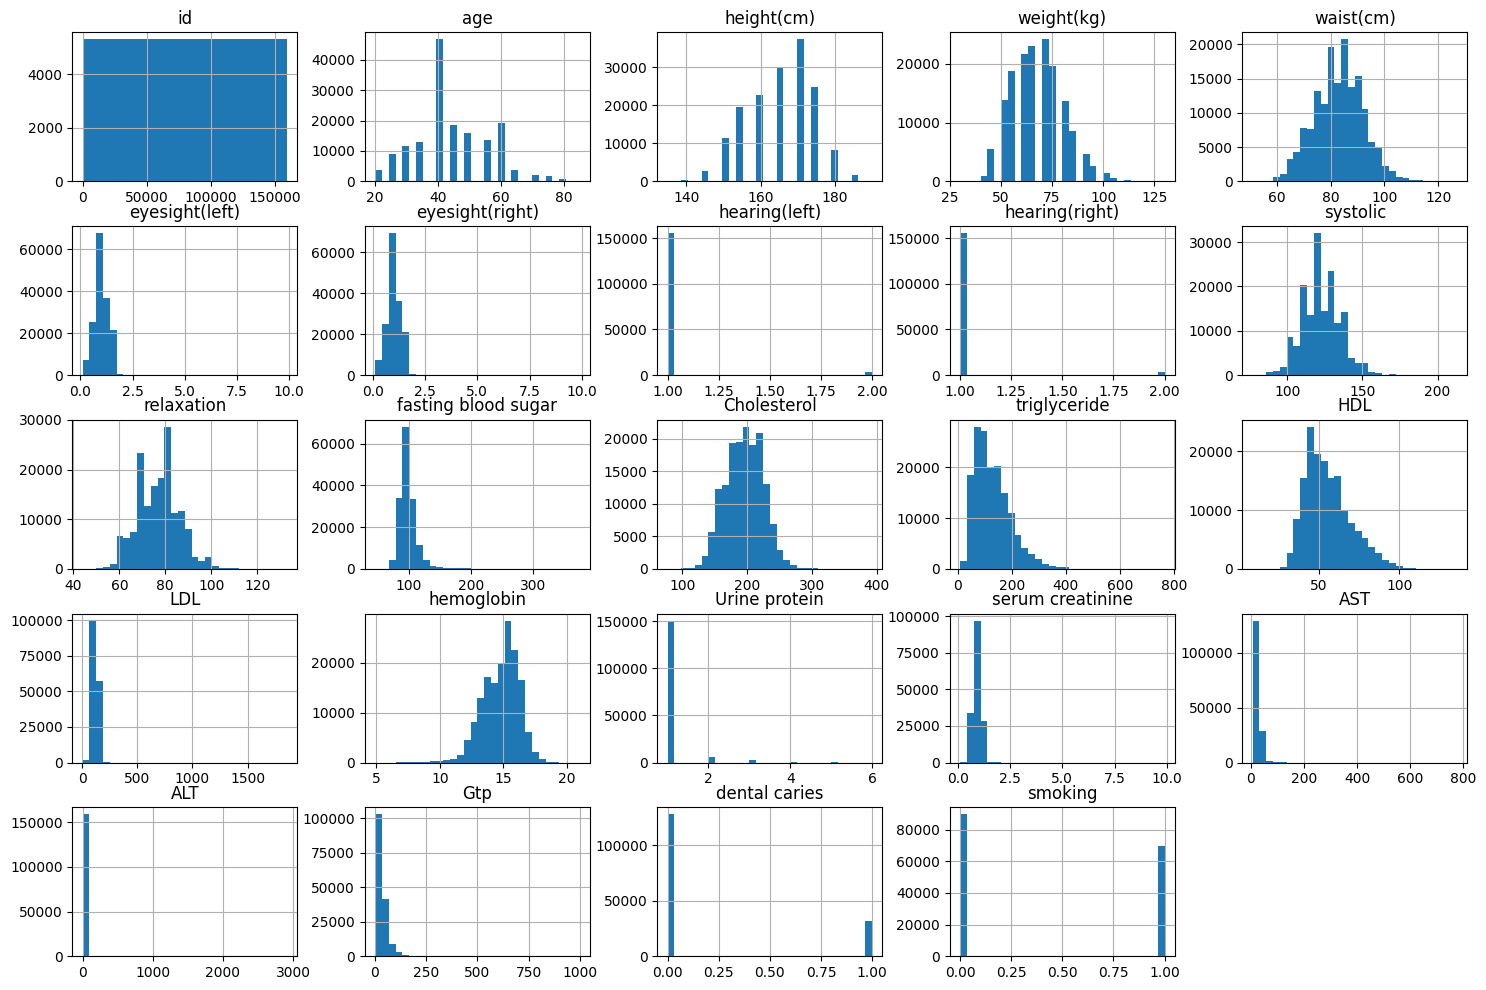

In [5]:
# Histograms for all the variables
train_df.hist(bins=30, figsize=(18, 12))

The preliminary data visualization shows that the majority of the individuals in the study are in the age 40 age group. A range of the age group may be necessary to better visualize the data

#### *Creating Variables*

The Body Mass Index (BMI) is a person's weight (in kg) divided by the square of height in meters. A high BMI can indicate high body fatness. The BMI screens for weight categories that may lead to health problems but it does not diagnose the body fatness or health of an individual.

Cigarette use is associated with higher BMI, but magnitudes vary by age. Models run on early, middle and older adolescents show that the relationship diminishes over time. The relationship between BMI and smoking decreases as females age but increases for males.

Link to study: *https://www.sciencedirect.com/science/article/pii/S2352853218301305#:~:text=Cigarette%20use%20is%20associated%20with,but%20magnitudes%20vary%20by%20age.&text=Models%20run%20on%20early%2C%20middle,the%20relationship%20diminishes%20over%20time.&text=The%20relationship%20between%20BMI%20and,age%20but%20increases%20for%20males.*

In [6]:
# Formula for BMI is weight(in kg) / [height(in cm)]^2
train_df['bmi'] = train_df['weight(kg)'] / (train_df['height(cm)']/100)**2

BMI is used to broadly define different weight groups in adults 20 years old or older.

- Underweight: BMI is less than 18.5
- Normal weight: BMI is 18.5 to 24.9
- Overweight: BMI is 25 to 29.9
- Obese: BMI is 30 or more

In [7]:
bmi_define = []
for i in range(0,len(train_df['bmi'])):
    if train_df['bmi'][i] < 18.5:
        rating = 'underweight'
    elif (train_df['bmi'][i] >= 18.5) and (train_df['bmi'][i] < 24.9):
        rating = 'Normal'
    elif (train_df['bmi'][i] >= 24.9) and (train_df['bmi'][i] < 29.9):
        rating = 'Overweight'
    elif (train_df['bmi'][i] >= 29.9):
        rating = 'Obese'
    bmi_define.append(rating)
train_df['bmi_class'] = bmi_define

Since the age is in 5 year increments, we will categorize the age into 5-year age groups. This new variable will be callled "age_group". When looking at the unique ages in the dataset, we identified that certain ages were not in the "5 year gap" as mentioned in the background of the dataset. The unique ages can be seen below:

[20, 25, 30, 35, 40, 45, 49, 50, 55, 58, 60, 62, 65, 69, 70, 75, 80, 85]

We note that ages 49, 58, 62 and 69 are outside the 5-year age group. the "age_group" variable created will help in data visualization later on as well

In [8]:
agegroup_list = []
# Sort ages into an age group for easier analysis
for i in range(0,len(train_df['age'])):
    if train_df['age'][i] <=25:
        age_group = '20-25'
    elif train_df['age'][i] <=30:
        age_group = '25-30'
    elif train_df['age'][i] <= 35:
        age_group = '30-35'
    elif train_df['age'][i] <= 40:
        age_group = '35-40'
    elif train_df['age'][i] <= 45:
        age_group = '40-45'
    elif train_df['age'][i] <= 50:
        age_group = '45-50'
    elif train_df['age'][i] <= 55:
        age_group = '50-55'
    elif train_df['age'][i] <= 60:
        age_group = '55-60'
    elif train_df['age'][i] <= 65:
        age_group = '60-65'
    elif train_df['age'][i] <= 70:
        age_group = '65-70'
    elif train_df['age'][i] <= 75:
        age_group = '70-75'
    elif train_df['age'][i] <= 80:
        age_group = '75-80'
    elif train_df['age'][i] > 80:
        age_group = '85+'
    agegroup_list.append(age_group)

# Create age group variable
train_df['age_group'] = agegroup_list

## 3. Analyzing the Data

Text(0.5, 1.0, 'Count of Age Group')

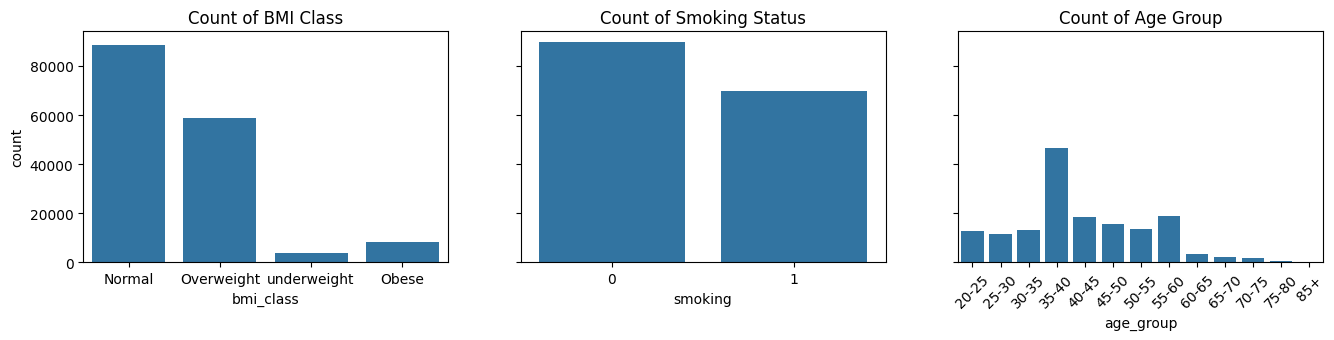

In [9]:
# Subplot
f, axes = plt.subplots(1,3, sharey = True, )
f.set_figheight(3) #controls the subplot height & width
f.set_figwidth(16)
p1 = sns.countplot(data = train_df, x = 'bmi_class', ax = axes[0])
p1.set_title('Count of BMI Class')
p2 = sns.countplot(data = train_df, x = 'smoking', ax = axes[1])
p2.set_title('Count of Smoking Status')
p3 = sns.countplot(data = train_df.sort_values(by=['age_group']), x = 'age_group', ax = axes[2])
plt.xticks(rotation=45) #rotated 45deg to fit in everything
p3.set_title('Count of Age Group')

We note that the majority of individudals have a nomal BMI and are non-smokers. However we also see that many individuals are overweight. The majority of the individuals are in the 35-40 age group. There are not a lot of individuals in the 65+ category. We may have to recategorize all the individuals aged 65+ into a single category for additional data visualization

<Axes: title={'center': 'Hemoglobin vs. BMI'}, xlabel='bmi', ylabel='hemoglobin'>

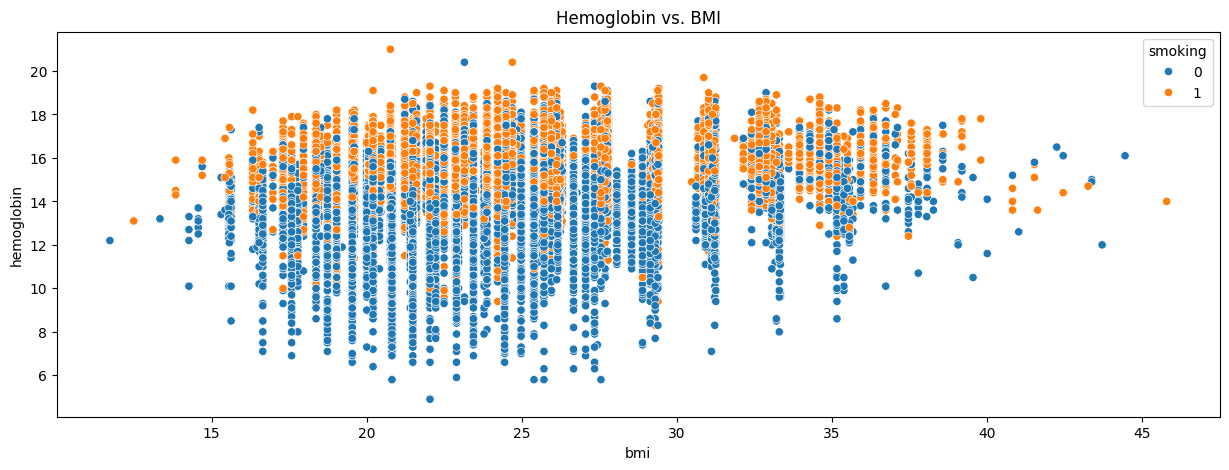

In [10]:
plt.figure(figsize = (15,5))
plt.title('Hemoglobin vs. BMI')
sns.scatterplot(data = train_df, x = 'bmi', y = 'hemoglobin', hue = 'smoking')

We note that individuals with higher hemoglobin are more likely to be smokers. We also note that individuals with higher bmi have a higher smoker count

<Figure size 1200x500 with 0 Axes>

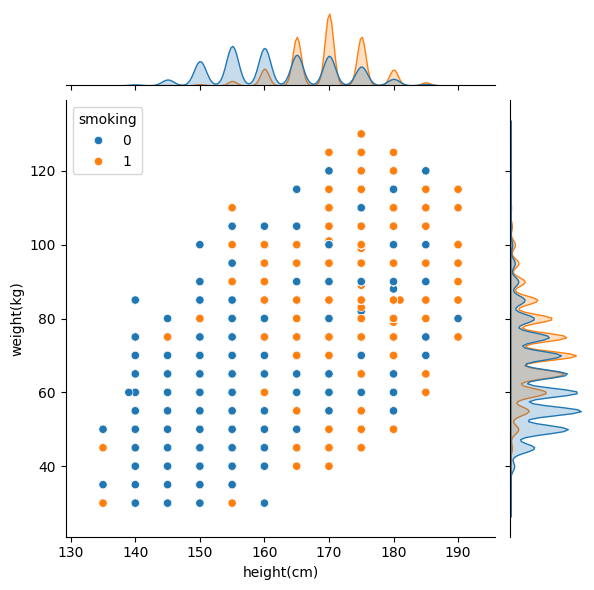

In [11]:
plt.figure(figsize = (12,5))
sns.jointplot(data = train_df, x = 'height(cm)', y = 'weight(kg)', hue = 'smoking')

We note that individuals that weigh more and are taller are more likely to be smokers. This would also correlate with the BMI studies that we have previously linked.

<Figure size 1200x500 with 0 Axes>

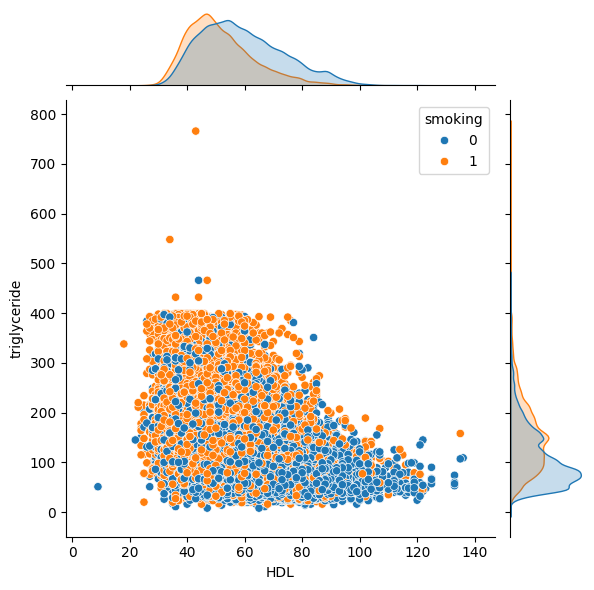

In [12]:
plt.figure(figsize = (12,5))
sns.jointplot(data = train_df, x = 'HDL', y = 'triglyceride', hue = 'smoking')

Individuals that have higher triglyceride and lower HDL are more likely to be smokers. Its also worth noting that non-smoker status is high at the lowest levels of triglyceride and higher levels of HDL. This is in line with medical research since smoking results in higher triglyceride.

<Axes: title={'center': 'Smoking status vs. dental caries'}, xlabel='dental caries', ylabel='count'>

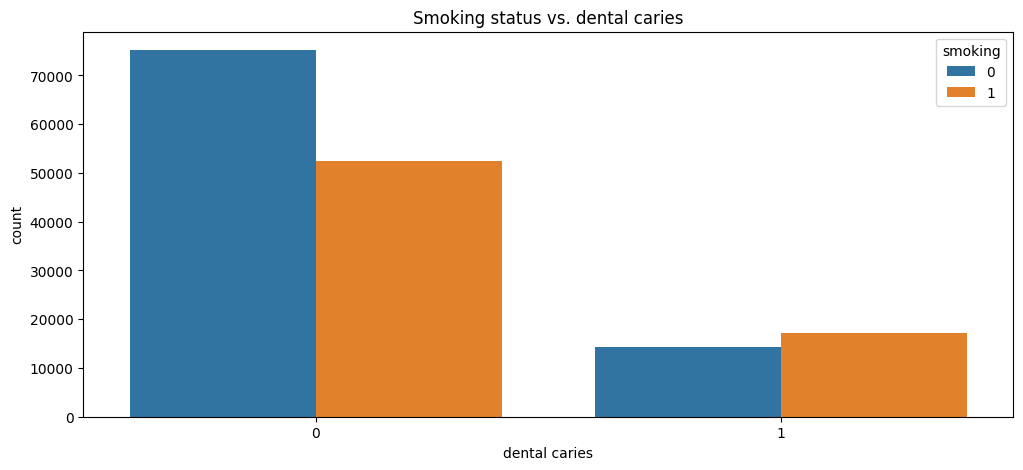

In [13]:
plt.figure(figsize = (12,5))
plt.title('Smoking status vs. dental caries')
sns.countplot(data = train_df, x = 'dental caries', hue = 'smoking')

The dental caries is higher for smokers due to teeth decay being correlated to smokers. (Source: https://www.cdc.gov/oralhealth/fast-facts/tobacco-use/index.html#:~:text=Untreated%20tooth%20decay%20is%20higher,cigarettes%20have%20untreated%20tooth%20decay.&text=Adults%20aged%2065%20or%20older,as%20those%20who%20never%20smoked.)

## 4. Correlation of Variables

In [14]:
corr_data = train_df.loc[:, ~train_df.columns.isin(['age_group', 'bmi_class'])].corr()
# Select the top correlated independent variables with the dependent variable (smoking status)
# We have selected variables with a correlation greater than 0.15
top_corr_features = corr_data.index[abs(corr_data["smoking"])>0.15]

<Axes: >

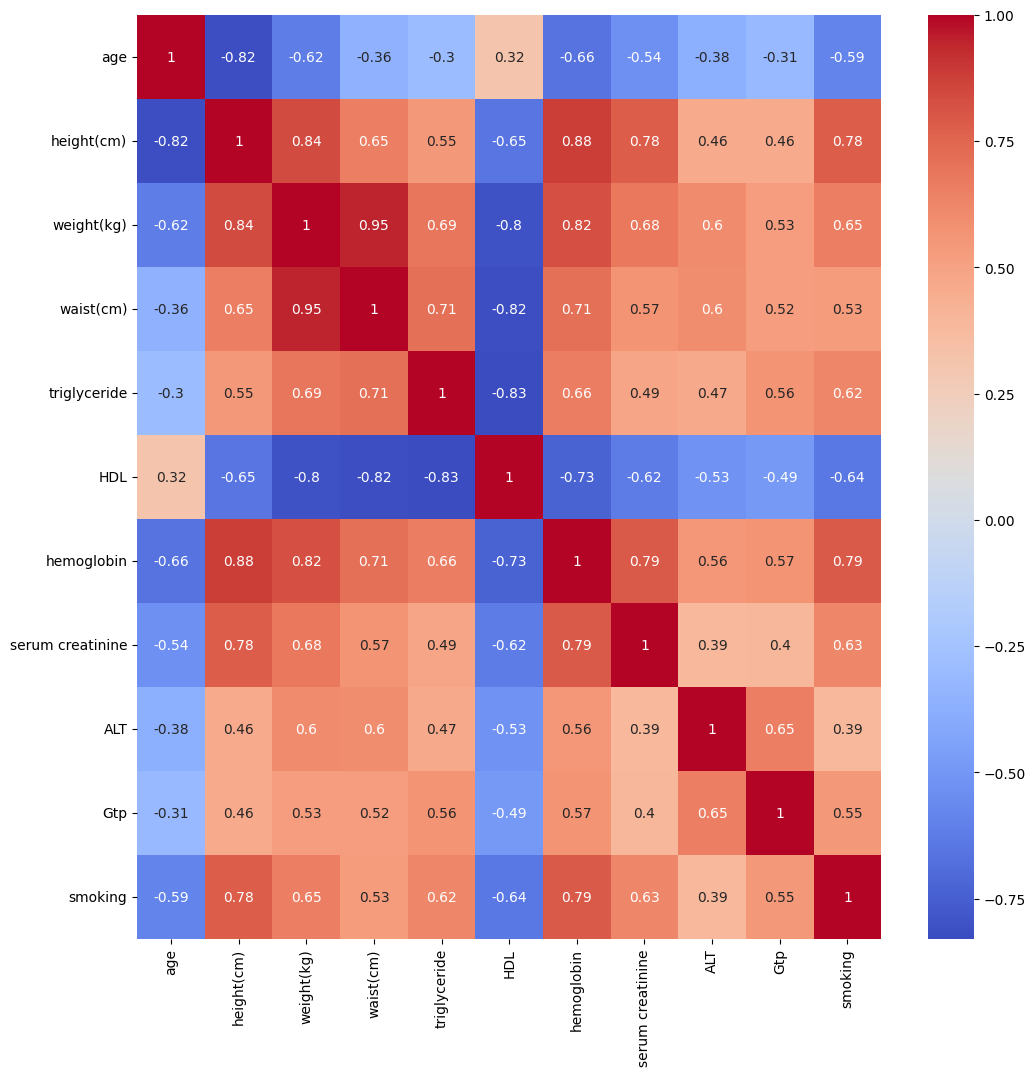

In [15]:
plt.figure(figsize = (12,12))
sns.heatmap(corr_data[top_corr_features].corr(), annot = True, cmap = 'coolwarm')

The correlation plot above highlights the most correlated variables to smoker status. We note that height and hemoglobin are the most correlated variables to the smoker status. In a previous study in China, it was noted that taller women tended to be smokers (https://www.tandfonline.com/doi/abs/10.1080/07448481.2022.2037612). However, this may also be a bias of the dataset. 

Higher hemoglobin occurs most commonly when the body needs an increased oxygen carrying capacity. This is common in smokers. (https://www.mayoclinic.org/symptoms/high-hemoglobin-count/basics/causes/sym-20050862#:~:text=A%20high%20hemoglobin%20count%20occurs,You%20smoke)

## 5. Shape Data for the Model

In [28]:
# Make same changes to the test dataset

# Create BMI variable
test_df['bmi'] = test_df['weight(kg)'] / (test_df['height(cm)']/100)**2

# Create BMI define variable
bmi_define = []
for i in range(0,len(test_df['bmi'])):
    if test_df['bmi'][i] < 18.5:
        rating = 'underweight'
    elif (test_df['bmi'][i] >= 18.5) and (test_df['bmi'][i] < 24.9):
        rating = 'Normal'
    elif (test_df['bmi'][i] >= 24.9) and (test_df['bmi'][i] < 29.9):
        rating = 'Overweight'
    elif (test_df['bmi'][i] >= 29.9):
        rating = 'Obese'
    bmi_define.append(rating)
test_df['bmi_class'] = bmi_define

# Create age-group variable
agegroup_list = []
# Sort ages into an age group for easier analysis
for i in range(0,len(test_df['age'])):
    if test_df['age'][i] <=25:
        age_group = '20-25'
    elif test_df['age'][i] <=30:
        age_group = '25-30'
    elif test_df['age'][i] <= 35:
        age_group = '30-35'
    elif test_df['age'][i] <= 40:
        age_group = '35-40'
    elif test_df['age'][i] <= 45:
        age_group = '40-45'
    elif test_df['age'][i] <= 50:
        age_group = '45-50'
    elif test_df['age'][i] <= 55:
        age_group = '50-55'
    elif test_df['age'][i] <= 60:
        age_group = '55-60'
    elif test_df['age'][i] <= 65:
        age_group = '60-65'
    elif test_df['age'][i] <= 70:
        age_group = '65-70'
    elif test_df['age'][i] <= 75:
        age_group = '70-75'
    elif test_df['age'][i] <= 80:
        age_group = '75-80'
    elif test_df['age'][i] > 80:
        age_group = '85+'
    agegroup_list.append(age_group)

# Create age group variable
test_df['age_group'] = agegroup_list

In [57]:
train_df[top_corr_features[:-1]]

,age,height(cm),weight(kg),waist(cm),triglyceride,HDL,hemoglobin,serum creatinine,ALT,Gtp
0,55,165,60,81.0,300,40,16.5,1.0,25,27
1,70,165,65,89.0,55,57,16.2,1.1,23,37
2,20,170,75,81.0,197,45,17.4,0.8,31,53
3,35,180,95,105.0,203,38,15.9,1.0,27,30
4,30,165,60,80.5,87,44,15.4,0.8,13,17
...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,47,72,14.5,0.8,26,13
159252,50,155,75,82.0,202,64,14.5,0.6,20,18
159253,40,160,50,66.0,45,87,10.9,0.6,9,12
159254,50,165,75,92.0,148,55,14.4,1.1,17,37


In [61]:
x_train = train_df[top_corr_features[:-1]]
y_train = train_df['smoking']
x_test = test_df[top_corr_features[:-1]]

## 6. Generalized Linear Model

In [59]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
submission_glm = pd.DataFrame({"id":np.array(test_df['id']),
                               "smoking":np.array(predictions)})
submission_glm.to_csv('submission_glm.csv',index = False)

## 6. Random Forest

In [76]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(x_train,y_train)
predictions = rfc.predict(x_test)

In [77]:
submission_rfm = pd.DataFrame({"id":np.array(test_df['id']),
                               "smoking":np.array(predictions)})
submission_rfm.to_csv('submission_rfm.csv',index = False)

## 7. Conclusion

I noted that the random Forest model did better than the GLM. The GLM scored 0.72508 in the model submission whereas the random forest scored 0.77727. 